## Every Visit Off-Policy Monte Carlo Prediction with Importance Sampling

In [1]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

from gridworld import GridWorld,plot_value,plot_policy
import numpy as np

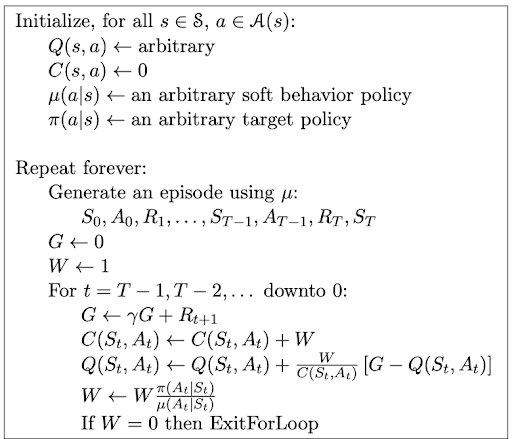

In [82]:
def generate_episode(Mu,size):
    '''
    play an episode on given policy and return G on state-action pairs
    
    Return a dictionary where k is (s,a), value is summation of all rewards after first visit
    '''
    
    env = GridWorld(size)
    done = False
    episode = [] #episode history
    G = 0
    while not done:
        #current_state
        current_state = env.agent_position.copy()
        
        #get action and step
        action_prob = Mu[tuple(current_state)] #
        action = np.random.choice(range(len(action_prob)),p = action_prob)
        next_state, reward, done, info = env.step(action)
        
        episode.append({'St':tuple(current_state), 'At':action,'Rt':reward,'St+1':tuple(next_state)})
        G+=reward
    
    return episode

In [83]:
def MC_prediction_off_policy(Pi,Mu,size,iter_num, gamma = 0.8):

    '''
    off-policy every-visit MC prediction algorithm
    '''
    Q = {k:0 for k in [((i,j),a) for i in range(size) for j in range(size) for a in range(4)]}
    C = {k:0 for k in [((i,j),a) for i in range(size) for j in range(size) for a in range(4)]}
    
    
    for _ in range(iter_num):
        
        episode = generate_episode(Mu,size) #generate an episode using Mu
        G = 0
        W = 1
        
        #Reverse order loop through the episode
        for step in reversed(episode):
            
            #G at step t equals current reward + discounted future reward
            G = gamma*G + step['Rt']
            
            #
            C[(step['St'],step['At'])] = C[(step['St'],step['At'])]+W
            update_term = W/C[(step['St'],step['At'])]*(G-Q[(step['St'],step['At'])])

            Q[(step['St'],step['At'])] = Q[(step['St'],step['At'])]+update_term
            W = W * Pi[(step['St'])][step['At']]/Mu[(step['St'])][step['At']]
            
            if W == 0:
                break
    
    for state in Pi.keys():
        action_values = [v for k,v in Q.items() if k[0] == state]
        best_action = np.argmax(action_values)
        Pi[state] = [1 if i == best_action else 0 for i in range(4)]  
    
    
    return Q,C,Pi

In [84]:
size = 6
Pi = dict.fromkeys([(i,j) for i in range(size) for j in range(size) if i+j != 0 and i+j != (size-1)*2], [0.25]*4)# inital actions as UP
Mu = dict.fromkeys([(i,j) for i in range(size) for j in range(size) if i+j != 0 and i+j != (size-1)*2], [0.1,0.1,0.7,0.1])# inital actions as UP

In [85]:
Q,C,Pi = MC_prediction_off_policy(Pi,Mu,size,1000)

In [86]:
plot_policy(Pi,size)

X	|←	|↓	|→	|→	|→	|
↑	|↓	|↓	|→	|↓	|↓	|
↑	|←	|↓	|↓	|↓	|↓	|
↓	|←	|→	|→	|↓	|↓	|
→	|→	|→	|→	|→	|↓	|
→	|→	|→	|→	|→	|X	|
 
